In [1]:
#Load packages
import pandas as pd
import numpy as np
import scipy.io as sio
import random
import scipy
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN

In [2]:
#This function is used to encode labels since labels are categorical.
def encode_labels(labels):
    le = LabelEncoder()
    le.fit(labels)
    encoded_labels = le.transform(labels)
    
    return encoded_labels, le

def decode_labels(encoded_predict_labels, le):
    test_predictions = le.inverse_transform(encoded_predict_labels)
    
    return test_predictions

#Mean class accuracy
def mean_class_acc(predictions, true_labels):
    matrix = confusion_matrix(true_labels, predictions)
    acc = matrix.diagonal()/matrix.sum(axis=1)

    return sum(acc)/len(acc)

In [3]:
#Load data
whole = sio.loadmat('whole_wolabels.mat')

In [4]:
#whole

#train
train_classid = np.squeeze(whole['train_classid'])
train_class_labels = []
for item in train_classid:
    train_class_labels.append(item[0])
train_features = whole['train_feats']
train_imid = whole['train_imgid']
train_imgid = []
for item in train_imid:
    train_imgid.append(item[0])
train_imgid = np.squeeze(train_imgid)
train_sampleid = whole['train_sampleid']

#validation
validation_classid = np.squeeze(whole['val_classid'])
validation_class_labels = []
for item in validation_classid:
    validation_class_labels.append(item[0])
validation_features = whole['val_feats']
validation_imid = whole['val_imgid']
validation_imgid = []
for item in validation_imid:
    validation_imgid.append(item[0])
validation_imgid = np.squeeze(validation_imgid)
validation_sampleid = whole['val_sampleid']

#test
test_features = whole['test_feats']
test_imid = whole['test_imgid']
test_imgid = []
for item in test_imid:
    test_imgid.append(item[0])
test_imgid = np.squeeze(test_imgid)
test_sampleid = whole['test_sampleid']

#encoded train labels
train_labels, le = encode_labels(train_class_labels)
print(len(train_labels))

#encoded validation labels
validation_labels = le.transform(validation_class_labels)
print(len(validation_labels))

7849
1379


In [ ]:
#parts

#train
train_classid_parts = np.squeeze(parts['train_classid'])
train_class_labels_parts = []
for item in train_classid_parts:
    train_class_labels_parts.append(item[0])
train_features_parts = parts['train_feats']
train_imid_parts = parts['train_imgid']
train_imgid_parts = []
for item in train_imid_parts:
    train_imgid_parts.append(item[0])
train_imgid_parts = np.squeeze(train_imgid_parts)
train_sampleid_parts = parts['train_sampleid']
train_tileid_parts = parts['train_tileid']

#validation
validation_classid_parts = np.squeeze(parts['val_classid'])
validation_class_labels_parts = []
for item in validation_classid_parts:
    validation_class_labels_parts.append(item[0])
validation_features_parts = parts['val_feats']
validation_imid_parts = parts['val_imgid']
validation_imgid_parts = []
for item in validation_imid_parts:
    validation_imgid_parts.append(item[0])
validation_imgid_parts = np.squeeze(validation_imgid_parts)
validation_sampleid_parts = parts['val_sampleid']
validation_tileid_parts = parts['val_tileid']

#test
test_features_parts = parts['test_feats']
test_imid_parts = parts['test_imgid']
test_imgid_parts = []
for item in test_imid_parts:
    test_imgid_parts.append(item[0])
test_imgid_parts = np.squeeze(test_imgid_parts)
test_sampleid_parts = parts['test_sampleid']
test_tileid_parts = parts['test_tileid']

See train distribution

In [5]:
Count = Counter(train_labels)
print(Count)

Counter({526: 60, 344: 57, 677: 45, 517: 42, 715: 41, 92: 40, 283: 38, 584: 36, 890: 36, 712: 35, 95: 32, 535: 31, 183: 30, 343: 30, 441: 30, 606: 30, 634: 30, 80: 29, 99: 29, 556: 29, 532: 28, 85: 27, 992: 27, 489: 26, 639: 26, 684: 26, 41: 25, 692: 25, 898: 25, 215: 24, 288: 24, 421: 24, 720: 24, 91: 23, 104: 23, 349: 23, 409: 23, 669: 23, 48: 22, 190: 22, 348: 22, 470: 22, 529: 22, 907: 22, 984: 22, 93: 21, 258: 21, 326: 21, 430: 21, 534: 21, 24: 20, 198: 20, 265: 20, 378: 20, 388: 20, 511: 20, 522: 20, 96: 19, 102: 19, 120: 19, 331: 19, 351: 19, 389: 19, 420: 19, 664: 19, 926: 19, 39: 18, 137: 18, 157: 18, 304: 18, 347: 18, 374: 18, 461: 18, 468: 18, 519: 18, 543: 18, 559: 18, 582: 18, 775: 18, 828: 18, 920: 18, 121: 17, 148: 17, 346: 17, 376: 17, 435: 17, 467: 17, 483: 17, 537: 17, 863: 17, 86: 16, 89: 16, 225: 16, 273: 16, 296: 16, 354: 16, 397: 16, 440: 16, 460: 16, 727: 16, 732: 16, 745: 16, 876: 16, 883: 16, 888: 16, 892: 16, 158: 15, 168: 15, 221: 15, 236: 15, 249: 15, 291: 1

In [ ]:
train_n, d = train_features_parts.shape
print(train_n,d)
train_features_parts_bags = train_features_parts.reshape(int(train_n/9), 9*d)
print(train_features_parts_bags.shape)

val_n, d = validation_features_parts.shape
print(val_n,d)
validation_features_parts_bags = validation_features_parts.reshape(int(val_n/9), 9*d)
print(validation_features_parts_bags.shape)

In [ ]:
#encoded train labels
train_labels_bags, le_parts = encode_labels(train_class_labels)
print(len(train_labels_bags))
train_unique_labels = sorted(np.unique(train_labels_bags))
train_unique_labels_count = len(train_unique_labels)
print("Train unique labels count:", train_unique_labels_count)

#encoded validation labels
validation_labels_bags = le_parts.transform(validation_class_labels)
print(len(validation_labels_bags))
validation_unique_labels = sorted(np.unique(validation_labels_bags))
validation_unique_labels_count = len(validation_unique_labels)
print("Validation unique labels count:", validation_unique_labels_count)

In [ ]:
cost_param = [10, 15]
N_components = [1000, 1100, 1200, 1300, 1400]
combined_train_features = []
combined_validation_features = []
for i in range(len(train_features_parts_bags)):
    combined_train_features.append(np.concatenate((train_features[i], train_features_parts_bags[i]), axis=None))
print(np.array(combined_train_features).shape)

for i in range(len(validation_features_parts_bags)):
    combined_validation_features.append(np.concatenate((validation_features[i], validation_features_parts_bags[i]), axis=None))
print(np.array(combined_validation_features).shape)

for n_components in N_components:
    pca = PCA(n_components=n_components)
    train_features_red = pca.fit_transform(combined_train_features)
    validation_features_red = pca.transform(combined_validation_features)
    print("PCA dimension:", n_components)
    for c in cost_param:
        clf = LogisticRegression(C = c, solver = 'liblinear', class_weight = 'balanced', random_state=0)
        print("cost parameter:", c)
        clf.fit(combined_train_features, train_labels_bags)
        score = clf.score(combined_validation_features, validation_labels_bags)
        print(score)
        preds = clf.predict(combined_validation_features)
        mean_acc = mean_class_acc(preds, validation_labels_bags)
        print("Mean class accuracy:", mean_acc)

In [6]:
#normalization

#minmax
scalar_minmax = MinMaxScaler()
train_features_norm_minmax = scalar_minmax.fit_transform(train_features)
validation_features_norm_minmax = scalar_minmax.transform(validation_features)

#z-score
scalar_standard = StandardScaler()
train_features_norm_standard = scalar_standard.fit_transform(train_features)
validation_features_norm_standard = scalar_standard.transform(validation_features)

Barplot before SMOTE

<AxesSubplot:>

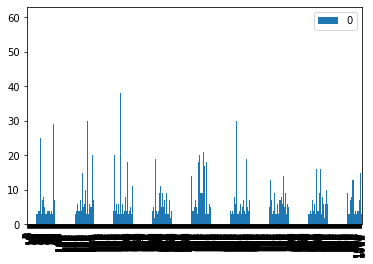

In [7]:
count = Counter(train_labels)
df = pd.DataFrame.from_dict(count, orient='index')
df.plot(kind='bar')

duplicating a label with sample count 1 to get oversampling working

In [8]:
index = np.where(train_labels == 784)[0][0]
print(index)
print(train_labels[index])

n, d = train_features_norm_minmax.shape
print(n,d)

train_features_sm = np.zeros((n+1, d))
train_features_sm[:n,:] = train_features_norm_minmax
train_features_sm[n,:] = train_features_norm_minmax[index]
train_labels_sm = np.array(list(train_labels) + [train_labels[index]])

print(train_features_sm.shape)
print(len(train_labels_sm))
print(Counter(train_labels_sm))

6322
784
7849 384
(7850, 384)
7850
Counter({526: 60, 344: 57, 677: 45, 517: 42, 715: 41, 92: 40, 283: 38, 584: 36, 890: 36, 712: 35, 95: 32, 535: 31, 183: 30, 343: 30, 441: 30, 606: 30, 634: 30, 80: 29, 99: 29, 556: 29, 532: 28, 85: 27, 992: 27, 489: 26, 639: 26, 684: 26, 41: 25, 692: 25, 898: 25, 215: 24, 288: 24, 421: 24, 720: 24, 91: 23, 104: 23, 349: 23, 409: 23, 669: 23, 48: 22, 190: 22, 348: 22, 470: 22, 529: 22, 907: 22, 984: 22, 93: 21, 258: 21, 326: 21, 430: 21, 534: 21, 24: 20, 198: 20, 265: 20, 378: 20, 388: 20, 511: 20, 522: 20, 96: 19, 102: 19, 120: 19, 331: 19, 351: 19, 389: 19, 420: 19, 664: 19, 926: 19, 39: 18, 137: 18, 157: 18, 304: 18, 347: 18, 374: 18, 461: 18, 468: 18, 519: 18, 543: 18, 559: 18, 582: 18, 775: 18, 828: 18, 920: 18, 121: 17, 148: 17, 346: 17, 376: 17, 435: 17, 467: 17, 483: 17, 537: 17, 863: 17, 86: 16, 89: 16, 225: 16, 273: 16, 296: 16, 354: 16, 397: 16, 440: 16, 460: 16, 727: 16, 732: 16, 745: 16, 876: 16, 883: 16, 888: 16, 892: 16, 158: 15, 168: 15

Oversampling with SMOTE sampling strategy = 'minority'

In [9]:
train_features_sm_minority = train_features_sm
train_labels_sm_minority = train_labels_sm
sm_minority = SMOTE(sampling_strategy = 'minority', k_neighbors=1, random_state=42)
for i in range(30):
    train_features_sm_minority, train_labels_sm_minority = sm_minority.fit_resample(train_features_sm_minority, train_labels_sm_minority)

Barplot after Oversampling with SMOTE sampling strategy = 'minority'

(9582, 384)
(9582,)


<AxesSubplot:>

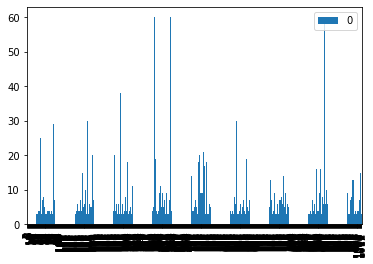

In [10]:
print(train_features_sm_minority.shape)
print(train_labels_sm_minority.shape)

count = Counter(train_labels_sm_minority)
df = pd.DataFrame.from_dict(count, orient='index')
df.plot(kind='bar')

In [11]:
# SMOTE oversampling_strategy = minority
print(Counter(train_labels_sm_minority))

Counter({0: 60, 1: 60, 5: 60, 10: 60, 12: 60, 17: 60, 18: 60, 19: 60, 34: 60, 161: 60, 197: 60, 234: 60, 318: 60, 385: 60, 386: 60, 393: 60, 411: 60, 434: 60, 439: 60, 515: 60, 526: 60, 542: 60, 553: 60, 576: 60, 690: 60, 726: 60, 784: 60, 889: 60, 900: 60, 912: 60, 919: 60, 344: 57, 677: 45, 517: 42, 715: 41, 92: 40, 283: 38, 584: 36, 890: 36, 712: 35, 95: 32, 535: 31, 183: 30, 343: 30, 441: 30, 606: 30, 634: 30, 80: 29, 99: 29, 556: 29, 532: 28, 85: 27, 992: 27, 489: 26, 639: 26, 684: 26, 41: 25, 692: 25, 898: 25, 215: 24, 288: 24, 421: 24, 720: 24, 91: 23, 104: 23, 349: 23, 409: 23, 669: 23, 48: 22, 190: 22, 348: 22, 470: 22, 529: 22, 907: 22, 984: 22, 93: 21, 258: 21, 326: 21, 430: 21, 534: 21, 24: 20, 198: 20, 265: 20, 378: 20, 388: 20, 511: 20, 522: 20, 96: 19, 102: 19, 120: 19, 331: 19, 351: 19, 389: 19, 420: 19, 664: 19, 926: 19, 39: 18, 137: 18, 157: 18, 304: 18, 347: 18, 374: 18, 461: 18, 468: 18, 519: 18, 543: 18, 559: 18, 582: 18, 775: 18, 828: 18, 920: 18, 121: 17, 148: 17

Combining oversampling with undersampling using SMOTE 

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/

oversampling: SMOTE, undersampling: RandomUndersampler

In [56]:
# define pipeline
over = SMOTE(sampling_strategy='minority', k_neighbors=1, random_state=42)
under = RandomUnderSampler(sampling_strategy='majority')
steps = [('o', over), ('u', under)]
pipeline_sm_rus = Pipeline(steps=steps)

train_features_sm_rus = train_features_sm
train_labels_sm_rus = train_labels_sm

for i in range(30):
    train_features_sm_rus, train_labels_sm_rus = pipeline_sm_rus.fit_resample(train_features_sm_rus, train_labels_sm_rus)

Barplot after oversampling: SMOTE, undersampling: RandomUndersampler

(7850, 384)
(7850,)


<AxesSubplot:>

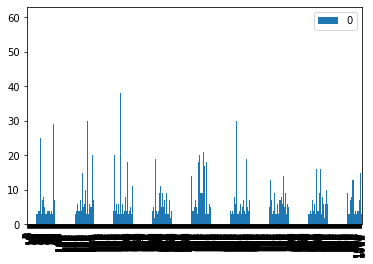

In [57]:
print(train_features_sm_rus.shape)
print(train_labels_sm_rus.shape)

count = Counter(train_labels_sm_rus)
df = pd.DataFrame.from_dict(count, orient='index')
df.plot(kind='bar')

Combination of SMOTE and Tomek Links Undersampling

In [32]:
# define resampling
sm_tomek = SMOTETomek(smote= SMOTE(sampling_strategy='minority', k_neighbors=1, random_state=42), tomek=TomekLinks(sampling_strategy='majority'))

train_features_sm_tomek = train_features_sm
train_labels_sm_tomek = train_labels_sm

for i in range(30):
    train_features_sm_tomek, train_labels_sm_tomek = sm_tomek.fit_resample(train_features_sm_tomek, train_labels_sm_tomek)

(9582,)
(9582,)


<AxesSubplot:>

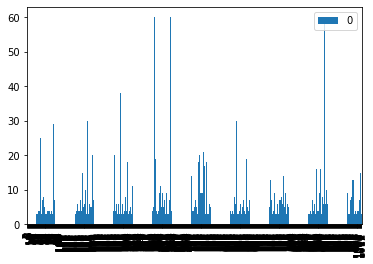

In [34]:
print(train_labels_sm_tomek.shape)
print(train_labels_sm_tomek.shape)

count = Counter(train_labels_sm_tomek)
df = pd.DataFrame.from_dict(count, orient='index')
df.plot(kind='bar')

In [35]:
# Combination of SMOTE and Tomek Links Undersampling
print(Counter(train_labels_sm_tomek))

Counter({0: 60, 1: 60, 5: 60, 10: 60, 12: 60, 17: 60, 18: 60, 19: 60, 34: 60, 161: 60, 197: 60, 234: 60, 318: 60, 385: 60, 386: 60, 393: 60, 411: 60, 434: 60, 439: 60, 515: 60, 526: 60, 542: 60, 553: 60, 576: 60, 690: 60, 726: 60, 784: 60, 889: 60, 900: 60, 912: 60, 919: 60, 344: 57, 677: 45, 517: 42, 715: 41, 92: 40, 283: 38, 584: 36, 890: 36, 712: 35, 95: 32, 535: 31, 183: 30, 343: 30, 441: 30, 606: 30, 634: 30, 80: 29, 99: 29, 556: 29, 532: 28, 85: 27, 992: 27, 489: 26, 639: 26, 684: 26, 41: 25, 692: 25, 898: 25, 215: 24, 288: 24, 421: 24, 720: 24, 91: 23, 104: 23, 349: 23, 409: 23, 669: 23, 48: 22, 190: 22, 348: 22, 470: 22, 529: 22, 907: 22, 984: 22, 93: 21, 258: 21, 326: 21, 430: 21, 534: 21, 24: 20, 198: 20, 265: 20, 378: 20, 388: 20, 511: 20, 522: 20, 96: 19, 102: 19, 120: 19, 331: 19, 351: 19, 389: 19, 420: 19, 664: 19, 926: 19, 39: 18, 137: 18, 157: 18, 304: 18, 347: 18, 374: 18, 461: 18, 468: 18, 519: 18, 543: 18, 559: 18, 582: 18, 775: 18, 828: 18, 920: 18, 121: 17, 148: 17

Combination of SMOTE and Edited Nearest Neighbors Undersampling

In [45]:
# define resampling
resample = SMOTEENN(smote= SMOTE(k_neighbors=1, random_state=42))

train_features_sm_enn = train_features_sm
train_labels_sm_enn = train_labels_sm

for i in range(30):
    train_features_sm_enn, train_labels_sm_enn = sm_tomek.fit_resample(train_features_sm_enn, train_labels_sm_enn)

(9582,)
(9582,)


<AxesSubplot:>

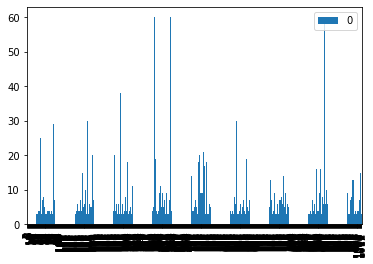

In [46]:
print(train_labels_sm_enn.shape)
print(train_labels_sm_enn.shape)

count = Counter(train_labels_sm_enn)
df = pd.DataFrame.from_dict(count, orient='index')
df.plot(kind='bar')

In [38]:
# Combination of SMOTE and Edited Nearest Neighbors Undersampling
print(Counter(train_labels_sm_enn))

Counter({0: 60, 1: 60, 5: 60, 10: 60, 12: 60, 17: 60, 18: 60, 19: 60, 34: 60, 161: 60, 197: 60, 234: 60, 318: 60, 385: 60, 386: 60, 393: 60, 411: 60, 434: 60, 439: 60, 515: 60, 526: 60, 542: 60, 553: 60, 576: 60, 690: 60, 726: 60, 784: 60, 889: 60, 900: 60, 912: 60, 919: 60, 344: 57, 677: 45, 517: 42, 715: 41, 92: 40, 283: 38, 584: 36, 890: 36, 712: 35, 95: 32, 535: 31, 183: 30, 343: 30, 441: 30, 606: 30, 634: 30, 80: 29, 99: 29, 556: 29, 532: 28, 85: 27, 992: 27, 489: 26, 639: 26, 684: 26, 41: 25, 692: 25, 898: 25, 215: 24, 288: 24, 421: 24, 720: 24, 91: 23, 104: 23, 349: 23, 409: 23, 669: 23, 48: 22, 190: 22, 348: 22, 470: 22, 529: 22, 907: 22, 984: 22, 93: 21, 258: 21, 326: 21, 430: 21, 534: 21, 24: 20, 198: 20, 265: 20, 378: 20, 388: 20, 511: 20, 522: 20, 96: 19, 102: 19, 120: 19, 331: 19, 351: 19, 389: 19, 420: 19, 664: 19, 926: 19, 39: 18, 137: 18, 157: 18, 304: 18, 347: 18, 374: 18, 461: 18, 468: 18, 519: 18, 543: 18, 559: 18, 582: 18, 775: 18, 828: 18, 920: 18, 121: 17, 148: 17

Normalization used is MinMaxScaler

Ridge Classifier

checking effect of oversampling: minority

In [59]:
clf = RidgeClassifier(class_weight = 'balanced', random_state=0)
clf.fit(train_features_sm_minority, train_labels_sm_minority)
preds = clf.predict(validation_features_norm_minmax)
score = clf.score(validation_features_norm_minmax, validation_labels)
print("Overall Accuracy:", score)
mean_acc = mean_class_acc(preds, validation_labels)
print("Mean class accuracy:", mean_acc)

Overall Accuracy: 0.7715736040609137
Mean class accuracy: 0.7631199172660179


Logistic Regression- Liblinear solver

Optimum cost parameter c = 20

In [12]:
clf_lr_sm_min = LogisticRegression(C = 20, solver = 'liblinear', class_weight = 'balanced', random_state=0)
clf_lr_sm_min.fit(train_features_sm_minority, train_labels_sm_minority)
preds = clf_lr_sm_min.predict(validation_features_norm_minmax)
score = clf_lr_sm_min.score(validation_features_norm_minmax, validation_labels)
print("Cost parameter:", 20)
print("Overall Accuracy:", score)
mean_acc = mean_class_acc(preds, validation_labels)
print("Mean class accuracy:", mean_acc)

Cost parameter: 20
Overall Accuracy: 0.8150833937635968
Mean class accuracy: 0.7816034409815258


SGDClassifier

In [13]:
clf_sgd_sm_min = SGDClassifier(class_weight = 'balanced', random_state=0)
clf_sgd_sm_min.fit(train_features_sm_minority, train_labels_sm_minority)
preds = clf_sgd_sm_min.predict(validation_features_norm_minmax)
score = clf_sgd_sm_min.score(validation_features_norm_minmax, validation_labels)
print("Overall Accuracy:", score)
mean_acc = mean_class_acc(preds, validation_labels)
print("Mean class accuracy:", mean_acc)

Overall Accuracy: 0.41406816533720087
Mean class accuracy: 0.39706200347858794


checking effect of oversampling + undersampling

oversampling: SMOTE, undersampling: RandomUndersampler

oversampling and undersampling: SMOTETOMEK

In [60]:
clf = RidgeClassifier(class_weight = 'balanced', random_state=0)
clf.fit(train_features_sm_tomek, train_labels_sm_tomek)
preds = clf.predict(validation_features_norm_minmax)
score = clf.score(validation_features_norm_minmax, validation_labels)
print("Overall Accuracy:", score)
mean_acc = mean_class_acc(preds, validation_labels)
print("Mean class accuracy:", mean_acc)

Overall Accuracy: 0.7715736040609137
Mean class accuracy: 0.7631199172660179


oversampling and undersampling: SMOTEENN

In [61]:
clf = RidgeClassifier(class_weight = 'balanced', random_state=0)
clf.fit(train_features_sm_enn, train_labels_sm_enn)
preds = clf.predict(validation_features_norm_minmax)
score = clf.score(validation_features_norm_minmax, validation_labels)
print("Overall Accuracy:", score)
mean_acc = mean_class_acc(preds, validation_labels)
print("Mean class accuracy:", mean_acc)

Overall Accuracy: 0.7715736040609137
Mean class accuracy: 0.7631199172660179
